In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('shop data.csv')

In [3]:
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [4]:
x = df.iloc[:,:-1] 
#x = df[['age', 'income', 'gender', 'm_status']]

In [13]:
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [5]:
#y = df.iloc[:,4]
y = df.buys

In [15]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
15    yes
16    yes
17    yes
18    yes
19    yes
20     no
21    yes
Name: buys, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_x=LabelEncoder()
x = x.apply(le_x.fit_transform)

In [8]:
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [76]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30, random_state=1)

In [77]:
xtrain

,age,income,gender,m_status
4,2,1,0,1
2,0,0,1,1
17,1,0,0,1
6,0,1,0,0
7,1,2,1,0
1,1,0,1,0
14,1,0,1,1
0,1,0,1,1
21,1,1,1,1
20,2,2,0,0


In [78]:
xtest

,age,income,gender,m_status
19,0,0,1,1
16,2,2,1,0
3,2,2,1,1
13,2,2,1,0
18,0,2,0,0
15,1,0,0,0
10,1,2,0,1


In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dect = DecisionTreeClassifier()

In [81]:
dect.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [82]:
dect.score(xtest, ytest)

0.8571428571428571

**Performance using cross_val_score**

In [49]:
from sklearn.model_selection import cross_val_score

In [51]:
result = cross_val_score(DecisionTreeClassifier(), x, y,cv=5)
result

array([0.6 , 0.6 , 0.75, 0.25, 0.5 ])

In [47]:
result.mean()

0.54

In [56]:
from sklearn.linear_model import LogisticRegression
result = cross_val_score(LogisticRegression(), x, y,cv=5)
result

array([0.4 , 0.6 , 0.75, 0.5 , 0.75])

In [57]:
result.mean()

0.6

In [67]:
y_predict = dect.predict(xtest)
y_predict

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00         3
         yes       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [70]:
#xinput = np.array([1,0,0,1])
xinput = np.array([1,0,1,1])

In [72]:
y_predict = dect.predict([xinput])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [73]:
y_predict

array(['yes'], dtype=object)

[Text(0.3333333333333333, 0.9, 'age <= 0.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4444444444444444, 0.7, 'gender <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.2222222222222222, 0.5, 'age <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.3, 'm_status <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.5, 'income <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.3, 'm_status <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Tex

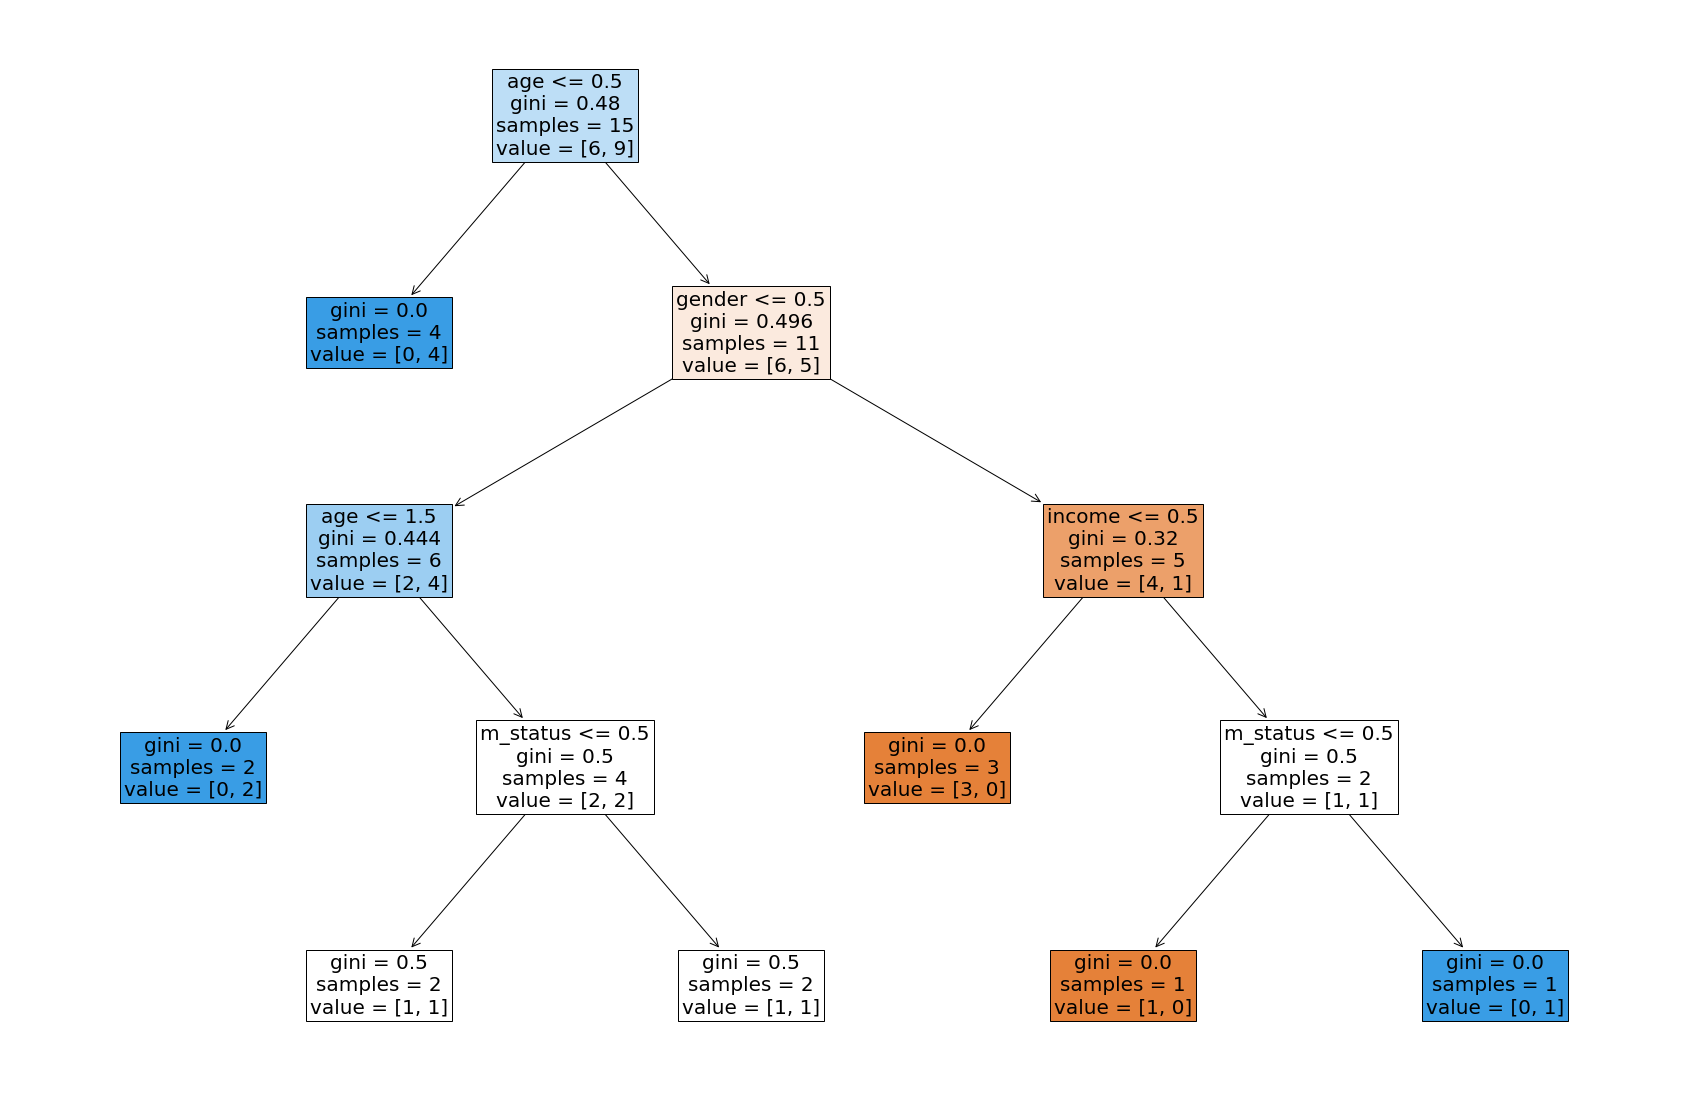

In [83]:
from sklearn import tree
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(30,20))
tree.plot_tree(dect, feature_names=x.columns, filled=True, fontsize=20)

### Tree Explanation

<img src="tree.jpg" />